In [1]:
#pip install opencv-python-headless matplotlib numpy easyocr imutils kaggle
#!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu --force-reinstall

In [2]:
import os # libary used to interect with operating system # bring in the os utilities module into namespace so we we can call as path ,od.dir etc
import zipfile # open zip file for reading loads module for interaction with zip archives(zip file)
import shutil # loads utilities for high level ops like rmtree ->coping image from one folder to another
import glob # loads file pattern matching functions

In [3]:
#get the current working directory
current_dir=os.getcwd()
print("current working directory :",current_dir)

current working directory : c:\Users\gaurav kumar\ml\infoysys


In [4]:
#listing all files and folders
items=os.listdir()
print("items in this folder :",items)

items in this folder : ['a.ipynb', 'addresses.csv', 'ANPR.ipynb', 'anpr_dataset', 'ANPR_DATASET.zip', 'Cars0.png', 'Cars1.png', 'Cars2.png', 'car_plate_data.yaml', 'car_plate_dataset.yaml', 'dashboard.py', 'dataset', 'detections', 'grades.csv', 'pandas.ipynb', 'runs', 'triple riding.mp4', 'yolov8n.pt', 'yolo_env', 'yolo_output.json', 'yolo_task.ipynb']


In [5]:
# creating and removing a folder
# create a new folder
os.mkdir("new_folder")
print("folder created successfully")

# remove that folder
os.rmdir("new_folder")
print("folder removed successfully")

folder created successfully
folder removed successfully


In [6]:
zip_path=r"ANPR_DATASET.zip"

In [7]:
extract_dir="anpr_dataset"


In [8]:
if os.path.exists(extract_dir):
    shutil.rmtree(extract_dir)
with zipfile.ZipFile(zip_path,'r')as zip_ref:
    zip_ref.extractall(extract_dir)

print("Data Extracted successfully in :",extract_dir)
print("Folders inside :",os.listdir(extract_dir))

Data Extracted successfully in : anpr_dataset
Folders inside : ['annotations', 'images']


In [9]:
#build images and annotation paths and check existence
images_path=os.path.join(extract_dir,"images")
annotations_path=os.path.join(extract_dir,"annotations")

print("Images folder :",os.path.exists(images_path))
print("Annotations folder :",os.path.exists(annotations_path))

Images folder : True
Annotations folder : True


In [10]:
#count image and xml files using glob.
sample_images=glob.glob(os.path.join(images_path,"*.png")) #finding similar patteen glob
sample_annotations=glob.glob(os.path.join(annotations_path,"*.xml"))

print(f"Total images found :{len(sample_images)}")
print(f"Total annotations found :{len(sample_annotations)}")

print("\nsample image file: ",sample_images[0])
print("sample annotation file :",sample_annotations[0])

Total images found :433
Total annotations found :433

sample image file:  anpr_dataset\images\Cars0.png
sample annotation file : anpr_dataset\annotations\Cars0.xml


In [11]:
import xml.etree.ElementTree as ET # it is python built in xml parser it is easy for reding and writing
#to print xml information

In [12]:
#open cv -> computer vision libary reads image in bgr

sample_xml="anpr_dataset/annotations/Cars0.xml"
tree=ET.parse(sample_xml)
root=tree.getroot()

print("Filename :",root.find('filename').text)
for obj in root.findall('object'):
    print("class:",obj.find('name').text)
    bbox=obj.find('bndbox')
    print("BBox coords:",
          bbox.find('xmin').text,bbox.find('ymin').text,
          bbox.find('xmin').text,bbox.find('ymin').text)

Filename : Cars0.png
class: licence
BBox coords: 226 125 226 125


In [13]:
#pip install matplotlib --force-reinstall --no-cache-dir
#!pip install "numpy<2.0" --force-reinstall

In [14]:
import cv2 
from matplotlib import pyplot as plt # to display the image

ModuleNotFoundError: No module named 'matplotlib.backends.registry'

In [ ]:
Sample_img_path="anpr_dataset/images/Cars0.png"
sample_xml_path="anpr_dataset/annotations/Cars0.xml"

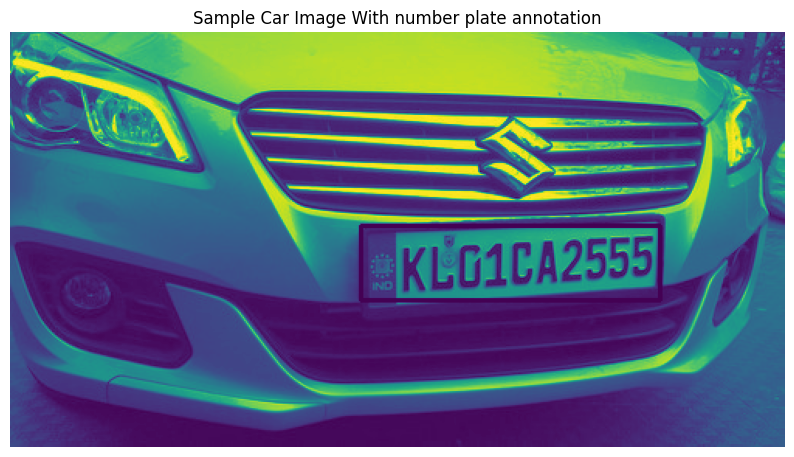

In [ ]:
# draw border around the number plate
img=cv2.imread(Sample_img_path) 
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

tree=ET.parse(sample_xml_path)
root=tree.getroot()

for obj in root.findall('object'):
    bbox=obj.find('bndbox')
    xmin=int(bbox.find('xmin').text)
    ymin=int(bbox.find('ymin').text)
    xmax=int(bbox.find('xmax').text)
    ymax=int(bbox.find('ymax').text)
    cv2.rectangle(img_rgb,(xmin,ymin),(xmax,ymax),(0,255,0),2)
    
plt.figure(figsize=(10,6))
plt.imshow(img_rgb)
plt.axis("off")
plt.title("Sample Car Image With number plate annotation")
plt.show()

In [ ]:
import random
images_path="anpr_dataset/images"
annotations_path="anpr_dataset/annotations"

#reading all image file
images=glob.glob(os.path.join(images_path,"*.png"))

#shuffle images randomly
random.seed(42)
random.shuffle(images)


#train test split ratio
split_ratio=0.8
split_index=int(len(images)*split_ratio)

#two list
train_images=images[:split_index]
val_images=images[split_index:]

#define folder structure for output data
train_dir="dataset/train"
val_dir="dataset/val"

#create the folder
for folder in [train_dir,val_dir]:
    for sub in["images","annotations"]:
        os.makedirs(os.path.join(folder,sub),exist_ok=True)
        
        
#make a function to remove images to their xml file 
def move_files(image_list,dest_folder):
    for img_path in image_list:
        filename = os.path.basename(img_path)
        shutil.copy(img_path,os.path.join(dest_folder,"images",filename))
    
    #matching xml anootation file
        xml_name=filename.replace(".png",".xml")
        xml_path=os.path.join(annotations_path,xml_name)
        if os.path.exists(xml_path):# check every image have bounding box data
            shutil.copy(xml_path,os.path.join(dest_folder,"annotations",xml_name))
    
move_files(train_images,train_dir)
move_files(val_images,val_dir)   

print("Train/Validation split done!")

Train/Validation split done!


In [ ]:
#YOLO (you only look once) object detection Alogorithm->finding object near me and bound boxes

# it run on normal laptop and gpu 
#how it works -> image divided into grid cell like chess 
#yolo version ->v3 now yolov5 used by beginner latest v9 
#1.bounding box  2.class label


In [ ]:
# from ultralytics import YOLO
# model=YOLO("yolo8s.pt")
# result=model("image.jpg")
# result.show()

In [ ]:
#parcel anotation to pixel corrdinate and bounding boxes into .txt from .xml
#because different object detect framework expect different anootation format one.txt with normalize image 
# it is required for normalization
# parcel viewer in pixel corrodinate yolo wants x center y center 
#
# enchance code by class mapping if we get error after that
# 

# convert pixel cord to n
#

In [ ]:
 #step 1 import library 
#1 from pil import image 
#2 import xml.etree.ElementTree as ET ->to read xml information
#3 import os ->to handle files and folder
# these three to read images ,annotation and save output file
# step 2 define a function to convert one xml to yolo line i.e read xmin ,ymin ,xmax ,ymax and convert to yolo and returns a list of string 
# step 3 read bounding box coordinate and then convert pixel coords into yolo normalize values then format the yolo line then return create folder level processing function
# 
#


In [ ]:
from PIL import Image #PIL to read image size.

In [ ]:
def convert_xml_to_yolo(xml_file,img_width,img_height):
    tree=ET.parse(xml_file)
    root=tree.getroot()
    yolo_lines=[]
    for obj in root.findall('object'):
        class_id=0
        bbox=obj.find('bndbox')
        xmin=int(bbox.find('xmin').text)
        ymin=int(bbox.find('ymin').text)
        xmax=int(bbox.find('xmax').text)
        ymax=int(bbox.find('ymax').text)
        x_center=((xmin+xmax)/2)/img_width # yolo does not accept raw pixel value it accept value 0 to 1 
        y_center=((ymin+ymax)/2)/img_height
        width=(xmax-xmin)/img_width
        height=(ymax-ymin)/img_height
        yolo_lines.append(f"(class_id){x_center:.6f}{y_center:.6f}{width:.6f}{height:.6f}")
        
    return yolo_lines

In [ ]:
# create a function to process a whole folder
    # ex dataset/train/images/
    # dataset/train/annotations/
    # make a new .txt file in a labels/folder

def process_folder(folder_path):
    img_folder=os.path.join(folder_path,"images")
    ann_folder =os.path.join(folder_path,"annotations")
    yolo_folder=os.path.join(folder_path,"labels")
    os.makedirs(yolo_folder,exist_ok=True)
    img_files=[f for f in os.listdir(img_folder)if f.lower().endswith(".png")]
    for img_file in img_files:
        img_path=os.path.join(img_folder,img_file)
        ann_file=img_file.replace(".png",".xml")
        ann_path=os.path.join(ann_folder,ann_file)
        with Image.open(img_path) as im:
            width,height=im.size
        if os.path.exists(ann_path):
            yolo_lines=convert_xml_to_yolo(ann_path,width,height)
        else:
            yolo_lines=[]
        txt_file=os.path.join(yolo_folder,img_file.replace(".png",".txt"))
        with open (txt_file,"w")as f:
            f.write("\n".join(yolo_lines))

In [ ]:
# run for train and test
process_folder(train_dir)
process_folder(val_dir)

print("XML annotations conveted to yolo format")

XML annotations conveted to yolo format


In [ ]:
# %pip uninstall -y torch torchvision torchaudio
#!pip install ultralytics

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import torch
from ultralytics import YOLO

OSError: [WinError 1114] A dynamic link library (DLL) initialization routine failed. Error loading "C:\Users\gaurav kumar\AppData\Roaming\Python\Python312\site-packages\torch\lib\c10.dll" or one of its dependencies.

In [ ]:
from ultralytics import YOLO

OSError: [WinError 1114] A dynamic link library (DLL) initialization routine failed. Error loading "C:\Users\gaurav kumar\AppData\Roaming\Python\Python312\site-packages\torch\lib\c10.dll" or one of its dependencies.

In [ ]:
#create a dataset for yaml file
# nc ->number of classes 
# dataset_yaml="""
# train: dataset/train/images
# val: dataset/val/images

# nc: 1
# names: ['licence']
# """
# #saving the  yaml file
# with open("car_plate_data.yaml","w")as f:
#     f.write(dataset_yaml)

# print("dataset yaml created! ")


dataset_yaml = """
path: .
train: dataset/train/images
val: dataset/val/images
nc: 1
names: ['licence']
"""
#saving the yaml file
with open("car_plate_dataset.yaml","w") as f:# write mode or replacing old model
  f.write(dataset_yaml)
  print("yaml file saved successfully")

yaml file saved successfully


In [ ]:
#loading a pre-trained Model
model = YOLO("yolov8n.pt")


# yolo v 8 nano model 


NameError: name 'YOLO' is not defined

In [ ]:
for cache_file in glob.glob("dataset/**/labels.cache", recursive=True):
    try:
        os.remove(cache_file)
        print(f"Deleted old cache: {cache_file}")
    except OSError:
        pass

print("Cache cleared. Starting training... 🚀")

Deleted old cache: dataset\train\labels.cache
Deleted old cache: dataset\val\labels.cache
Cache cleared. Starting training... 🚀


In [ ]:
import os
import glob
import re

def fix_mashed_labels(folder_path):
    # Get all text files in the folder
    files = glob.glob(os.path.join(folder_path, "*.txt"))
    print(f"📂 Scanning {len(files)} files in: {folder_path}")
    
    fixed_count = 0
    
    for file_path in files:
        with open(file_path, 'r') as f:
            content = f.read().strip()
            
        # Skip empty files
        if not content:
            continue
            
        # Check if the file is corrupted (contains '(class_id)' or lacks spaces)
        if "(class_id)" in content or " " not in content:
            # 1. Strip the confusing '(class_id)' text if present
            clean_content = content.replace("(class_id)", "")
            
            # 2. Extract numbers using Regex
            # We look for "0." followed by exactly 6 digits, which handles fused zeros like "0.1234560.654321"
            # If your data has different precision, we might need a different pattern, but 6 is standard.
            numbers = re.findall(r"0\.\d{6}", clean_content)
            
            # 3. Reconstruct the line
            if len(numbers) == 4:
                # Assuming class 0 for car plates. 
                # Format: class x_center y_center width height
                new_line = f"0 {numbers[0]} {numbers[1]} {numbers[2]} {numbers[3]}"
                
                with open(file_path, 'w') as f:
                    f.write(new_line)
                fixed_count += 1
            else:
                # Fallback: Try less strict pattern if 6-digit strict failed
                loose_numbers = re.findall(r"0\.\d+", clean_content)
                if len(loose_numbers) == 4:
                    new_line = f"0 {loose_numbers[0]} {loose_numbers[1]} {loose_numbers[2]} {loose_numbers[3]}"
                    with open(file_path, 'w') as f:
                        f.write(new_line)
                    fixed_count += 1
                else:
                    print(f"⚠️ Failed to fix: {os.path.basename(file_path)} (Found {len(numbers)} numbers)")

    print(f"✅ Fixed {fixed_count} corrupted files in {folder_path}\n")

# --- EXECUTION ---
# Get current directory (works in notebooks)
base_dir = os.getcwd()

# Define paths (Adjust if your folder name is different)
train_labels = os.path.join(base_dir, "dataset", "train", "labels")
val_labels = os.path.join(base_dir, "dataset", "val", "labels")

# 1. Run the fix
fix_mashed_labels(train_labels)
fix_mashed_labels(val_labels)

# 2. Delete the old cache so YOLO sees the changes
for path in [train_labels, val_labels]:
    cache_file = os.path.join(path, "labels.cache")
    if os.path.exists(cache_file):
        os.remove(cache_file)
        print(f"🗑️ Deleted old cache: {cache_file}")

print("🎉 Repair complete. Please restart your training cell.")

📂 Scanning 346 files in: c:\Users\gaurav kumar\ml\infoysys\dataset\train\labels
⚠️ Failed to fix: Cars106.txt (Found 16 numbers)
⚠️ Failed to fix: Cars146.txt (Found 16 numbers)
⚠️ Failed to fix: Cars249.txt (Found 16 numbers)
⚠️ Failed to fix: Cars277.txt (Found 16 numbers)
✅ Fixed 342 corrupted files in c:\Users\gaurav kumar\ml\infoysys\dataset\train\labels

📂 Scanning 87 files in: c:\Users\gaurav kumar\ml\infoysys\dataset\val\labels
⚠️ Failed to fix: Cars266.txt (Found 24 numbers)
⚠️ Failed to fix: Cars330.txt (Found 16 numbers)
✅ Fixed 85 corrupted files in c:\Users\gaurav kumar\ml\infoysys\dataset\val\labels

🎉 Repair complete. Please restart your training cell.


In [ ]:
# model.train(
#     data="car_plate_data.yaml", # tells yolo where dataset is store
#     epochs=20, # one epochs full pass over the entire dataset minimum 20 epochs more epochs more accuracy
#     imgsz=640,  #yolo input resolution
#     batch=4,    #no of images process at once
#     name="car_plate_detection",
#     # it created training folder it will train the curve ,validation matrix and confusion matrix
#     device="cpu"
# )

model.train(
    data = "car_plate_dataset.yaml",
    epochs = 20,
    imgsz = 640,
    batch = 4,
    name = "car_plate_detection"
)

NameError: name 'model' is not defined

In [ ]:
# make a visualization part using streamlit
#

In [ ]:
import random 
val_images_path =os.path.join("dataset/val/images") #
#
val_images =[f for f in os.listdir(val_images_path)if f.endswith(".png")]

#random validate image select
# picking a random validation Image 

test_img = os.path.join(val_images_path, random.choice(val_images)) # create full path to  a random image
# random.choice ->
print("testing on image :",test_img)




testing on image : dataset/val/images\Cars118.png


In [ ]:
# Running YOLOV8 Prdiction 

results = model.predict(test_img) # loads the model weight and it preprocess the input image then tun neural image  bbox and then apply on image and so on
# perform all the steps in one 
# bbox , confidence score ,mass ,ploted image 

results[0].plot() # output in list 


# to save ploted image
# results[0].save("output/")

NameError: name 'model' is not defined

In [ ]:

#results[0].show()


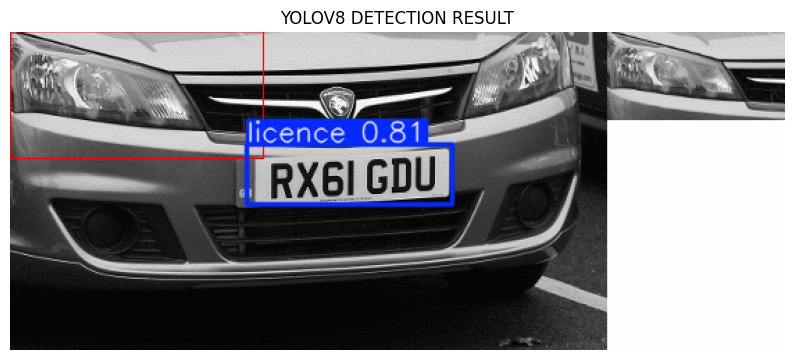

In [ ]:
# next step matplotlib and opencv visualization

from matplotlib import pyplot as plt
import cv2 

img_with_boxes = results[0].plot() 
img_rgb =cv2.cvtColor(img_with_boxes,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,6))
plt.imshow(img_rgb)
plt.axis('off')
plt.title("YOLOV8 DETECTION RESULT")
plt.show()

In [ ]:
# OCR works into 4 parts 1)preprocessing  3) character recognize 4)clean 2)resize
# it convert printed or hand written text into machine readable code
# Easy OCR (optical character Recognition)

# !pip install easyocr
!pip install "numpy<2.0" --force-reinstall

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 3.0.3 which is incompatible.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.8.1 which is incompatible.
ydata-profiling 4.16.1 requires scipy<1.16,>=1.4.1, but you have scipy 1.16.3 which is incompatible.
scikit-learn 1.4.2 requires joblib>=1.2.0, but you have joblib 1.1.1 which is incompatible.
streamlit 1.32.0 requires packaging<24,>

In [ ]:
import easyocr # convert images of text into string text
import cv2 
from matplotlib import pyplot as plt 

#Initialize OCR reader 
reader = easyocr.Reader(['en'])# en stands for english 

#Load the same image 
img = cv2.imread(test_img)
# opencv reads images as numpy array 
img_rgb =cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # matplotlib only supports rgb 

# get yolo detection box coordinates 
results = model.predict(test_img)[0] # [0] select first or dominate results i.e common batch output








Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.



image 1/1 c:\Users\gaurav kumar\ml\infoysys\dataset\val\images\Cars272.png: 288x640 1 licence, 53.6ms
Speed: 1.7ms preprocess, 53.6ms inference, 0.8ms postprocess per image at shape (1, 3, 288, 640)


Detected number plate text: [([[np.int32(15), np.int32(3)], [np.int32(143), np.int32(3)], [np.int32(143), 43], [np.int32(15), 43]], 'RXGI GDU', np.float64(0.8974966183811498))]


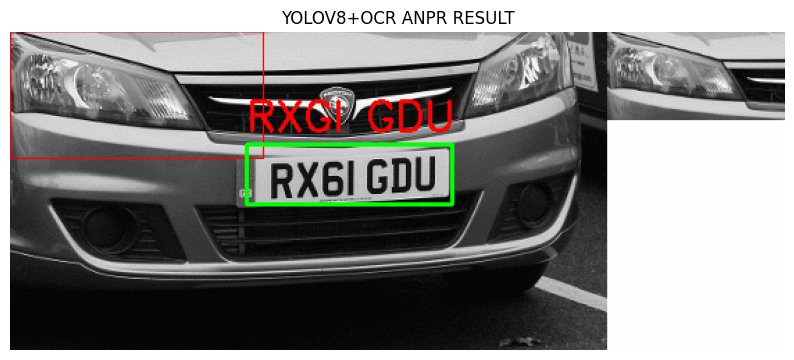

In [ ]:
# loop over detected object (plates)
for box in results.boxes.xyxy:
    xmin,ymin,xmax,ymax = map(int,box.cpu().numpy())
    plate_img = img[ymin:ymax,xmin:xmax] #crop detected plate using numpy slicing
    # ocr on cropped plate 
    ocr_result = reader.readtext(plate_img)
    print("Detected number plate text:",ocr_result)
    
    # draw green rectangle on text on original image
    cv2.rectangle(img_rgb,(xmin,ymin),(xmax,ymax),(0,255,0),2)
    if ocr_result:
        text = ocr_result[0][1] #first deteched text
        cv2.putText(img_rgb,text,(xmin,ymin-10),
                    cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0),2)
        

#show final image with ocr
plt.figure(figsize=(10,6))
plt.imshow(img_rgb)
plt.axis('off')
plt.title("YOLOV8+OCR ANPR RESULT")
plt.show()

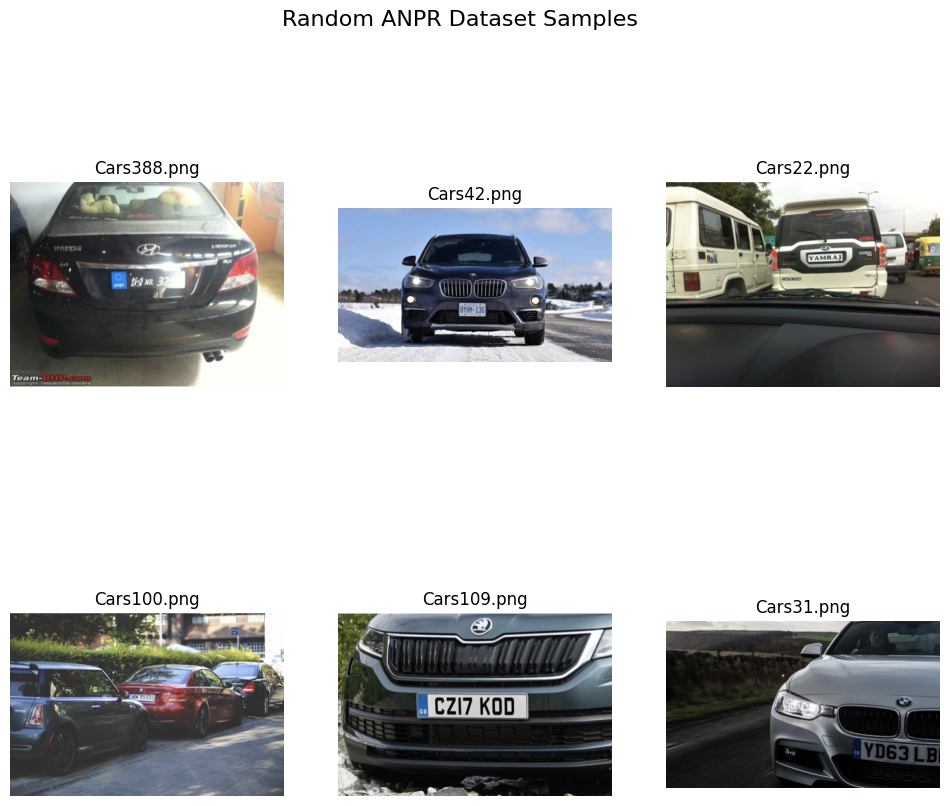

In [ ]:
# 1: Random Images Grid
import random

sample_imgs = random.sample(images, 6)

plt.figure(figsize=(12,10))
for i, name in enumerate(sample_imgs): # one by one
    path = os.path.join(IMG_DIR, name)
    img_temp = Image.open(path)

    plt.subplot(2,3,i+1)
    plt.imshow(img_temp)
    plt.title(name)
    plt.axis("off")

plt.suptitle("Random ANPR Dataset Samples", fontsize=16)
plt.show()


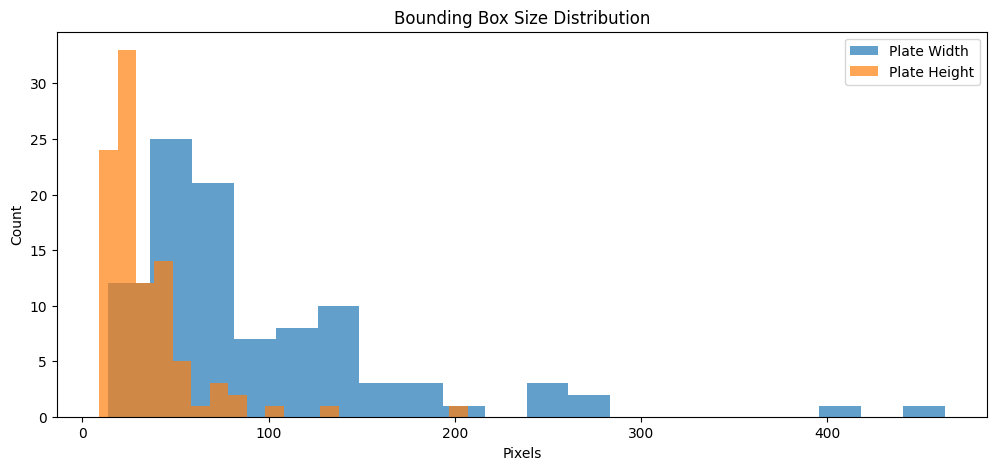

In [ ]:
# 2: Bounding Box Size Distribution (to check the size of the bounding box coordinate)
widths = []
heights = []

for im in images:
    xml_p = os.path.join(XML_DIR, im.replace(".png",".xml"))
    if os.path.exists(xml_p):
        boxes = load_xml(xml_p)
        for _, xmin, ymin, xmax, ymax in boxes:
            widths.append(xmax - xmin)
            heights.append(ymax - ymin)

plt.figure(figsize=(12,5))
plt.hist(widths, bins=20, alpha=0.7, label="Plate Width")
plt.hist(heights, bins=20, alpha=0.7, label="Plate Height")
plt.title("Bounding Box Size Distribution")
plt.xlabel("Pixels")
plt.ylabel("Count")
plt.legend()
plt.show()


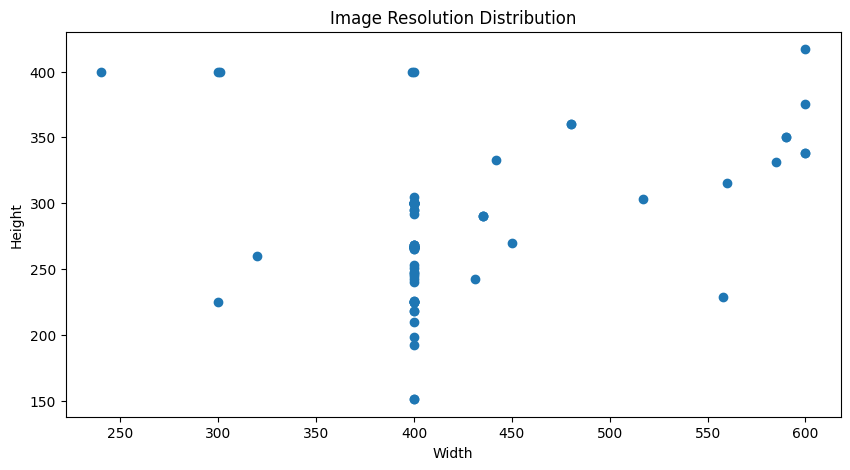

In [ ]:
# 3: Image Resolution Distribution
resolutions = []

for im in images:
    img_p = os.path.join(IMG_DIR, im)
    temp = Image.open(img_p)
    w, h = temp.size
    resolutions.append((w, h))

widths = [r[0] for r in resolutions]
heights = [r[1] for r in resolutions]

plt.figure(figsize=(10,5))
plt.scatter(widths, heights)
plt.title("Image Resolution Distribution")
plt.xlabel("Width")
plt.ylabel("Height")
plt.show()


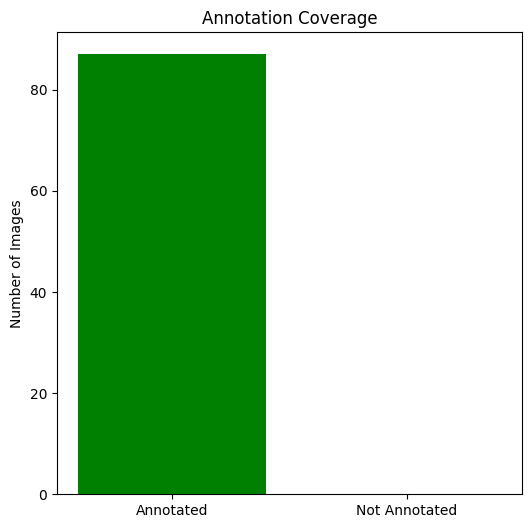

In [ ]:
# Annotation Statistics (to check how many image have .xml or annotation file)
annotated = 0
for f in images:
    xml_p = os.path.join(XML_DIR, f.replace(".png",".xml"))
    if os.path.exists(xml_p):
        annotated += 1

plt.figure(figsize=(6,6))
plt.bar(["Annotated","Not Annotated"], [annotated, len(images)-annotated], color=["green","red"])
plt.title("Annotation Coverage")
plt.ylabel("Number of Images")
plt.show()
